In [133]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns    


In [134]:
# 데이터 불러오기 
data_folder = "dataset/"
fileExt = r".txt"
not_header = ['description.txt','documentation.txt','profile.txt']
filenames= [file for file in os.listdir(data_folder) if file.endswith(fileExt) and file not in not_header]
program_1 = pd.read_csv(data_folder+filenames[0],sep=",", index_col=0)

header = [x[:-4] for x in filenames]
dataFrame = pd.DataFrame(columns=header)
dataFrame

# 데이터 불러오기

for i in range(len(filenames)):
    
    with open(data_folder + filenames[i]) as f:
        lines_after_header = f.readlines()
        data_list = []

        for line in range(len(lines_after_header)):
            data_list.append(float(lines_after_header[line].split()[0]))
    f.close()
    dataFrame[header[i]]=data_list
    
# profile 불러오기
with open(data_folder + 'profile.txt') as f:
    lines_after_header = f.readlines()
    data_list = []

    for line in range(len(lines_after_header)):
        data_list.append(lines_after_header[line].split())
f.close()
profile = pd.DataFrame(columns=['Cooler condition','Valve condition','Internal pump leakage','Hydraulic accumulator',
                                 'stable flag'],data= data_list)
profile=profile.astype('int')

dataFrame = pd.concat([dataFrame,profile],axis=1)

In [135]:
dataFrame.head()

,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,...,TS2,TS3,TS4,VS1,Cooler condition,Valve condition,Internal pump leakage,Hydraulic accumulator,stable flag
0,47.202,2.184,2411.6,8.990,10.179,151.47,125.50,2.305,0.0,...,40.961,38.320,30.363,0.604,3,100,0,130,1
1,29.208,1.414,2409.6,8.919,10.408,151.11,125.06,2.281,0.0,...,41.258,38.680,33.648,0.590,3,100,0,130,1
2,23.554,1.159,2397.8,9.179,10.392,150.81,125.13,2.227,0.0,...,42.129,39.234,35.113,0.578,3,100,0,130,1
3,21.540,1.101,2383.8,9.034,10.329,150.48,124.93,2.320,0.0,...,43.039,40.086,36.133,0.565,3,100,0,130,1
4,20.460,1.086,2372.0,8.729,10.276,150.41,124.72,2.250,0.0,...,44.031,40.934,36.992,0.570,3,100,0,130,1


2. 각 label들의 histogram

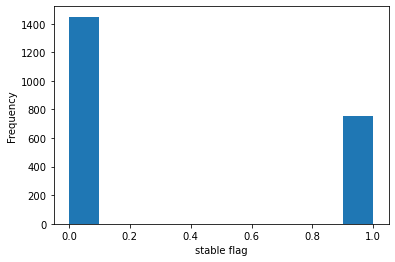

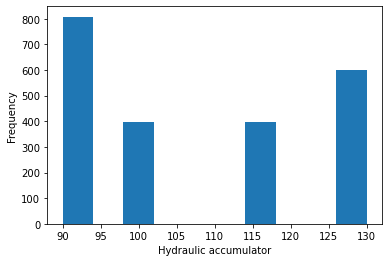

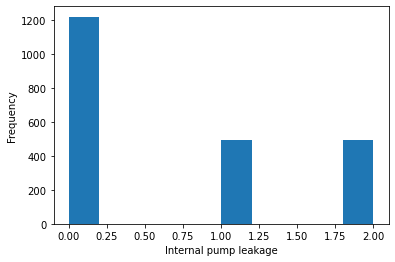

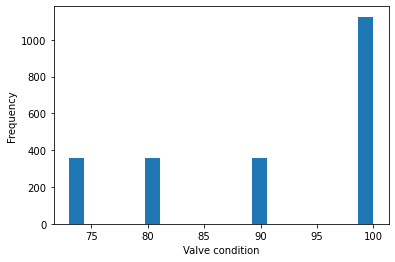

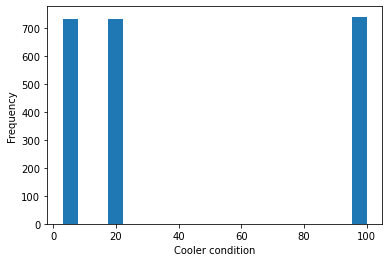

In [136]:


dataFrame.iloc[:,-1].plot.hist()
plt.xlabel(dataFrame.columns[-1])
plt.show()


dataFrame.columns[-1]

dataFrame.iloc[:,-2].plot.hist()
plt.xlabel(dataFrame.columns[-2])
plt.show()

dataFrame.iloc[:,-3].plot.hist()
plt.xlabel(dataFrame.columns[-3])
plt.show()

dataFrame.iloc[:,-4].plot.hist(bins=20)
plt.xlabel(dataFrame.columns[-4])
plt.show()

dataFrame.iloc[:,-5].plot.hist(bins=20)
plt.xlabel(dataFrame.columns[-5])
plt.show()

In [137]:
corr = dataFrame.corr()

# 컬럼 별로 관계가 0.3이상인 것들
co=0.3
for i in corr.columns[-5:]:
    print(i)
    print(corr[(corr[i]>co) | (corr[i]<-co)].index)
    print()

Cooler condition
Index(['CE', 'CP', 'EPS1', 'FS2', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6',
       'TS1', 'TS2', 'TS3', 'TS4', 'VS1', 'Cooler condition'],
      dtype='object')

Valve condition
Index(['Valve condition', 'Internal pump leakage', 'stable flag'], dtype='object')

Internal pump leakage
Index(['SE', 'Valve condition', 'Internal pump leakage', 'stable flag'], dtype='object')

Hydraulic accumulator
Index(['FS1', 'Hydraulic accumulator'], dtype='object')

stable flag
Index(['Valve condition', 'Internal pump leakage', 'stable flag'], dtype='object')



Text(0, 0.5, 'SE')

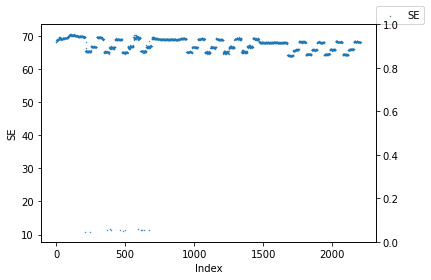

In [138]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter (dataFrame.index,dataFrame['SE'],s=0.2 ,label = 'SE')
ax1.legend(loc=(1.0,1.0))
ax1.set_xlabel('Index')
ax1.set_ylabel('SE')

Index(['CE', 'CP', 'EPS1', 'FS2', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6',
       'TS1', 'TS2', 'TS3', 'TS4', 'VS1', 'Cooler condition'],
      dtype='object')


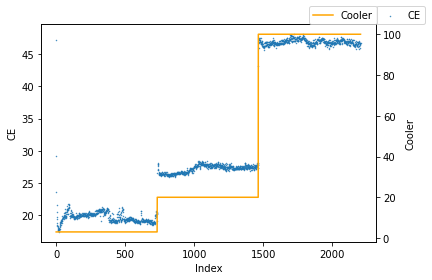

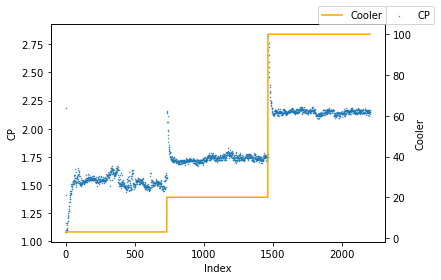

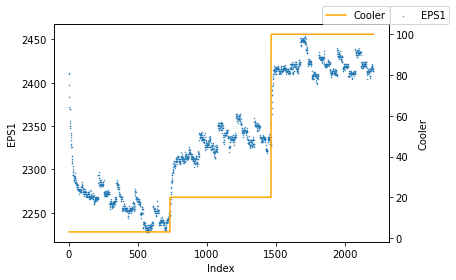

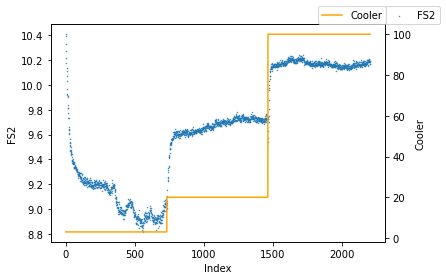

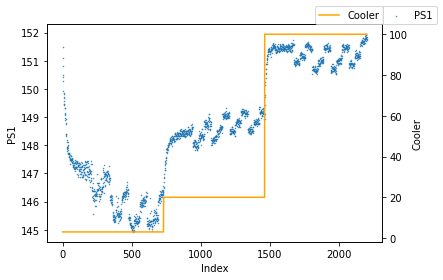

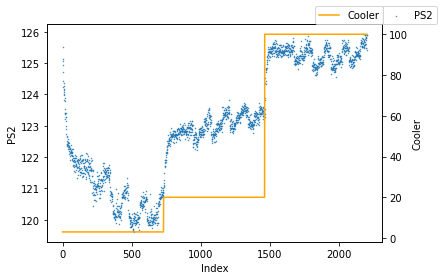

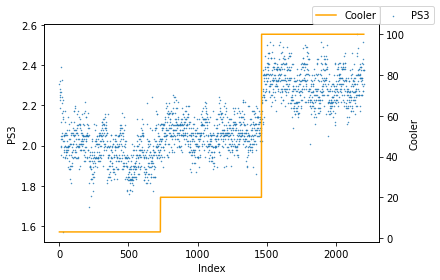

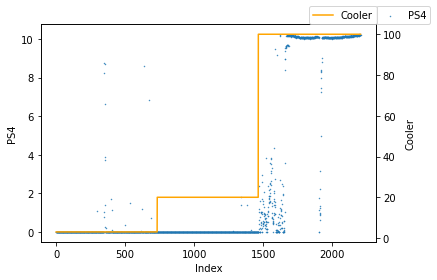

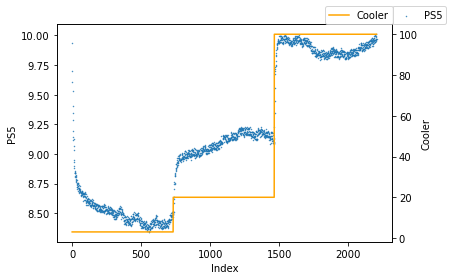

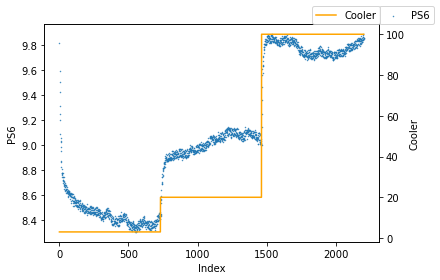

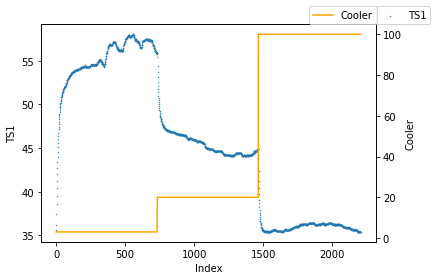

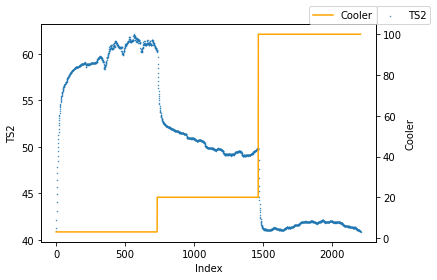

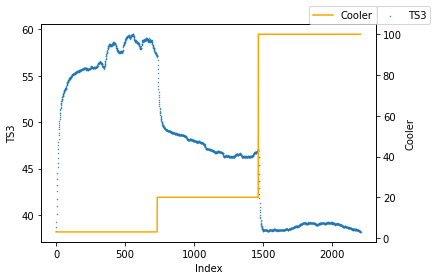

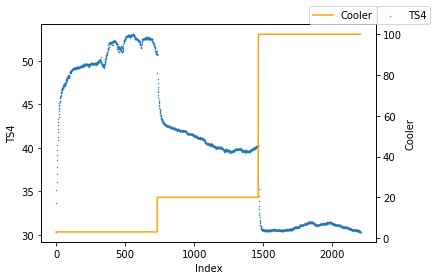

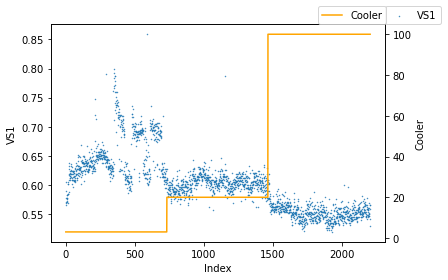

In [139]:
co=0.3
dataFrame2= dataFrame[dataFrame['SE']>20]

corr2=dataFrame2.corr()
print(corr2[(corr2['Cooler condition']>co) | (corr2['Cooler condition']<-co)].index)
for i in corr2[(corr2['Cooler condition']>co) | (corr2['Cooler condition']<-co)].index[:-1]:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.scatter (dataFrame2.index,dataFrame2[i],s=0.2 ,label = i)
    ax2.plot(dataFrame['Cooler condition'],label = 'Cooler',color='orange')
    ax1.legend(loc=(1.0,1.0))
    ax1.set_xlabel('Index')
    ax1.set_ylabel(i)
    ax2.set_ylabel('Cooler')
    
    ax2.legend(loc=(0.8,1.0))

## 각 센서들의 상관관계

In [140]:
dataFrame2.iloc[:,:-5].corr()

,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,PS6,SE,TS1,TS2,TS3,TS4,VS1
CE,1.000000,0.972077,0.953977,-0.095964,0.917357,0.934890,0.927232,0.846703,0.798983,0.971841,0.971950,-0.285169,-0.944205,-0.943963,-0.939313,-0.954593,-0.803064
CP,0.972077,1.000000,0.906516,-0.090637,0.866612,0.889249,0.880761,0.799824,0.736738,0.928889,0.928975,-0.262434,-0.903408,-0.900529,-0.894453,-0.918862,-0.756234
EPS1,0.953977,0.906516,1.000000,-0.142969,0.978466,0.958044,0.959609,0.802420,0.741423,0.986804,0.986585,-0.368878,-0.985102,-0.986411,-0.984630,-0.986145,-0.821788
FS1,-0.095964,-0.090637,-0.142969,1.000000,-0.108412,-0.097283,-0.112328,-0.014933,-0.160735,-0.085376,-0.084217,0.192473,0.089061,0.082059,0.093517,0.093004,0.098713
FS2,0.917357,0.866612,0.978466,-0.108412,1.000000,0.982946,0.985329,0.814469,0.674714,0.978475,0.978024,-0.224215,-0.994318,-0.993388,-0.995902,-0.990954,-0.855294
PS1,0.934890,0.889249,0.958044,-0.097283,0.982946,1.000000,0.997193,0.860180,0.688744,0.978989,0.978608,-0.103774,-0.984442,-0.981413,-0.985232,-0.984405,-0.874196
PS2,0.927232,0.880761,0.959609,-0.112328,0.985329,0.997193,1.000000,0.846352,0.683973,0.976406,0.975998,-0.116965,-0.984721,-0.981772,-0.985916,-0.983900,-0.871184
PS3,0.846703,0.799824,0.802420,-0.014933,0.814469,0.860180,0.846352,1.000000,0.642281,0.844175,0.844048,0.005502,-0.825528,-0.822305,-0.824492,-0.830774,-0.752905
PS4,0.798983,0.736738,0.741423,-0.160735,0.674714,0.688744,0.683973,0.642281,1.000000,0.727452,0.727596,-0.371464,-0.691296,-0.693118,-0.689209,-0.702932,-0.616936
PS5,0.971841,0.928889,0.986804,-0.085376,0.978475,0.978989,0.976406,0.844175,0.727452,1.000000,0.999933,-0.262314,-0.992139,-0.992385,-0.990731,-0.994548,-0.841811


<AxesSubplot:>

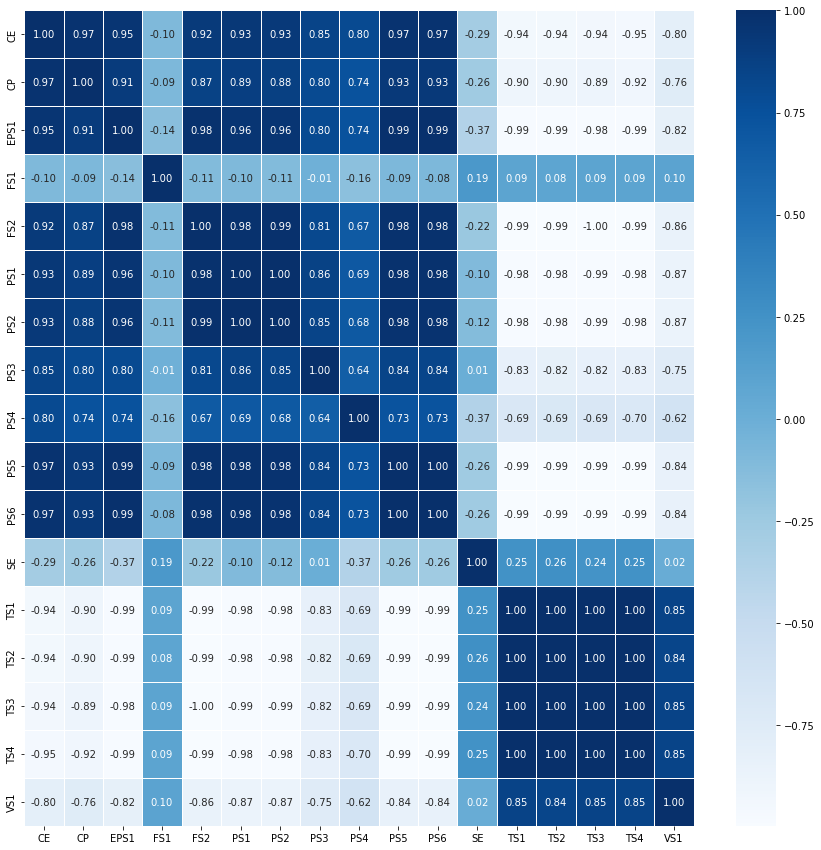

In [141]:
plt.figure(figsize=(15,15))
sns.heatmap(data = dataFrame2.iloc[:,:-5].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [142]:
print(corr2[(corr2['Cooler condition']>co) | (corr2['Cooler condition']<-co)]['Cooler condition'])


CE                  0.991090
CP                  0.953549
EPS1                0.927038
FS2                 0.880833
PS1                 0.907295
PS2                 0.897566
PS3                 0.843619
PS4                 0.816420
PS5                 0.947711
PS6                 0.947891
TS1                -0.909809
TS2                -0.910020
TS3                -0.904929
TS4                -0.921702
VS1                -0.779584
Cooler condition    1.000000
Name: Cooler condition, dtype: float64


In [143]:
X_train, X_test, y_train, y_test = train_test_split(dataFrame2.iloc[:,:-5], dataFrame2['Cooler condition'], test_size=0.3, random_state=42)
dtc  = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Cooler condition  정확도:", accuracy)
print("")


Cooler condition  정확도: 0.9969604863221885



Feature: CE, Importance: 0.5014513434295558
Feature: CP, Importance: 0.4946439599644514
Feature: EPS1, Importance: 0.0
Feature: FS1, Importance: 0.0019523519270397505
Feature: FS2, Importance: 4.5133836931418906e-05
Feature: PS1, Importance: 0.0
Feature: PS2, Importance: 0.0
Feature: PS3, Importance: 0.0
Feature: PS4, Importance: 0.0
Feature: PS5, Importance: 0.0019072108420215025
Feature: PS6, Importance: 0.0
Feature: SE, Importance: 0.0
Feature: TS1, Importance: 0.0
Feature: TS2, Importance: 0.0
Feature: TS3, Importance: 0.0
Feature: TS4, Importance: 0.0
Feature: VS1, Importance: 0.0


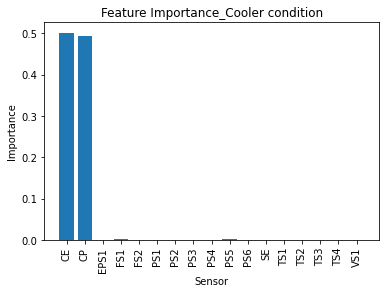

In [144]:
# 중요도 값 확인
importances = dtc.feature_importances_

# 중요도 값을 출력
for feature, importance in zip(X_train.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")

# 중요도 값을 그래프로 시각화
plt.bar(X_train.columns, importances)
plt.xlabel('Sensor') 
plt.ylabel('Importance')
plt.title('Feature Importance_Cooler condition')
plt.xticks(rotation=90)
plt.show()




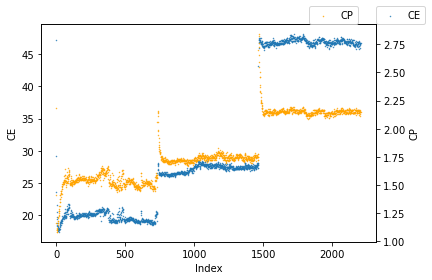

In [145]:
co=0.3
dataFrame2= dataFrame[dataFrame['SE']>20]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter (dataFrame2.index,dataFrame2['CE'],s=0.2 ,label = "CE")
ax2.scatter (dataFrame2.index,dataFrame2['CP'],s=0.2 ,label = 'CP',color='orange')
ax1.legend(loc=(1.0,1.0))
ax1.set_xlabel('Index')
ax1.set_ylabel('CE')
ax2.set_ylabel('CP')

ax2.legend(loc=(0.8,1.0))

In [146]:
x= pd.DataFrame(dataFrame2['CE'],columns=['CE'])
X_train, X_test, y_train, y_test = train_test_split(x, dataFrame2['Cooler condition'], test_size=0.3, random_state=42)
dtc  = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Cooler condition, CE  정확도:", accuracy)
print("")


Cooler condition, CE  정확도: 0.9984802431610942



In [147]:
x= pd.DataFrame(dataFrame2['CP'],columns=['CP'])
X_train, X_test, y_train, y_test = train_test_split(x, dataFrame2['Cooler condition'], test_size=0.3, random_state=42)
dtc  = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Cooler condition, CP  정확도:", accuracy)
print("")


Cooler condition, CP  정확도: 0.9878419452887538



데이터 0~1 scaling

In [148]:
# Min-Max 스케일링을 위한 scaler 객체 생성
scaler = MinMaxScaler()

# 데이터 프레임의 값에 Min-Max 스케일링 적용
scaled_df = pd.DataFrame(scaler.fit_transform(dataFrame2.iloc[:,:-5]), columns=dataFrame.columns[:-5])
scaled_df.head()

,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,PS6,SE,TS1,TS2,TS3,TS4,VS1
0,0.969656,0.626993,0.805434,0.735660,0.856156,0.933048,0.933439,0.746193,0.0,0.955635,0.956412,0.634252,0.007597,0.005693,0.006758,0.000353,0.250000
1,0.385055,0.188497,0.796670,0.707180,1.000000,0.881766,0.863708,0.721827,0.0,0.814149,0.813645,0.667965,0.033479,0.019667,0.023653,0.145143,0.208824
2,0.201365,0.043280,0.744961,0.811472,0.989950,0.839031,0.874802,0.667005,0.0,0.757794,0.758686,0.717561,0.092310,0.060647,0.049653,0.209714,0.173529
3,0.135932,0.010251,0.683611,0.753309,0.950377,0.792023,0.843106,0.761421,0.0,0.711031,0.706254,0.722505,0.142882,0.103463,0.089638,0.254672,0.135294
4,0.100845,0.001708,0.631902,0.630967,0.917085,0.782051,0.809826,0.690355,0.0,0.639089,0.638661,0.758466,0.179453,0.150136,0.129435,0.292533,0.150000


In [149]:
col = 'CE'
input_col= [x for x in scaled_df.columns if x not in ['CE','CP']]
# print(input_col)
X_train, X_test, y_train, y_test = train_test_split(scaled_df[input_col], scaled_df[col], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("CE  정확도:", accuracy)
print("")


CE  정확도: 0.9929536859814667



EPS1: -0.004090584080909207
FS1: -0.007335789578314322
FS2: 0.3501133905890724
PS1: 0.17796849945245505
PS2: -0.11298118011390298
PS3: 0.08892454735807748
PS4: 0.0804276044755311
PS5: 1.3518205305186348
PS6: -0.10737943515441338
SE: -0.02131847542634828
TS1: 1.823637941230875
TS2: -0.5398718198996757
TS3: 2.9305824725560905
TS4: -3.4987185759269135
VS1: -0.08221423433576958
Intercept: -0.6879636215108642


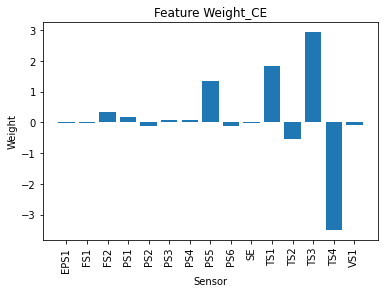

In [150]:
# 가중치 확인
# 변수의 가중치 확인
coefficients = lr.coef_
intercept = lr.intercept_

# 각 변수의 가중치 출력
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

# 절편(intercept) 출력
print("Intercept:", intercept)

# 가중치 값을 그래프로 시각화
plt.bar(X_train.columns, coefficients)
plt.xlabel('Sensor') 
plt.ylabel('Weight')
plt.title('Feature Weight_CE')
plt.xticks(rotation=90)
plt.show()


In [151]:
col = 'CP'
input_col= [x for x in scaled_df.columns if x not in ['CE','CP']]
# print(input_col)
X_train, X_test, y_train, y_test = train_test_split(scaled_df[input_col], scaled_df[col], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("CP  정확도:", accuracy)
print("")


CP  정확도: 0.9989991481065895



EPS1: 0.02631795638368513
FS1: -0.0028478326073715365
FS2: 0.06708026634290809
PS1: 0.018990824382758772
PS2: -0.0019189795474190002
PS3: 0.0033087937857210377
PS4: 0.000816389539018976
PS5: 0.057101977344463165
PS6: -0.028261196451253835
SE: 0.0007018545071031616
TS1: 0.03973409034289598
TS2: 0.08545596568138179
TS3: 3.0127613532993434
TS4: -3.3614540150853127
VS1: 0.0059905281984383735
Intercept: 0.4792994668592021


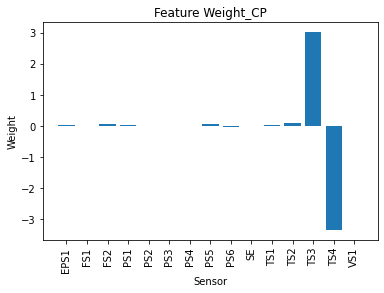

In [152]:
# 가중치 확인
# 변수의 가중치 확인
coefficients = lr.coef_
intercept = lr.intercept_

# 각 변수의 가중치 출력
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

# 절편(intercept) 출력
print("Intercept:", intercept)

# 가중치 값을 그래프로 시각화
plt.bar(X_train.columns, coefficients)
plt.xlabel('Sensor') 
plt.ylabel('Weight')
plt.title('Feature Weight_CP')
plt.xticks(rotation=90)
plt.show()


CP 값을 구하기 위한 가중치 중 큰 값만을 선정하여 예측이 가능한지 확인

In [153]:
li=[]

for feature, coef in zip(X_train.columns, coefficients):
    if (coef>0.05) | (coef <-0.05):
        li.append(feature)
print(li)
col = 'CP'
# print(input_col)
X_train, X_test, y_train, y_test = train_test_split(scaled_df[li], scaled_df[col], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("CP  정확도:", accuracy)
print("")


['FS2', 'PS5', 'TS2', 'TS3', 'TS4']
CP  정확도: 0.9989535211813751



FS2: 0.10531149705520462
PS5: 0.06174828701885099
TS2: 0.10391024926205011
TS3: 3.0583015919951535
TS4: -3.3582063438037877
Intercept: 0.45524365190644844


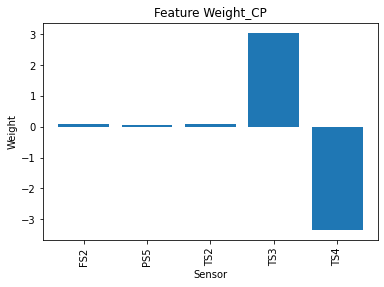

In [154]:
# 가중치 확인
# 변수의 가중치 확인
coefficients = lr.coef_
intercept = lr.intercept_

# 각 변수의 가중치 출력
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

# 절편(intercept) 출력
print("Intercept:", intercept)

# 가중치 값을 그래프로 시각화
plt.bar(X_train.columns, coefficients)
plt.xlabel('Sensor') 
plt.ylabel('Weight')
plt.title('Feature Weight_CP')
plt.xticks(rotation=90)
plt.show()


In [155]:
li=['TS3','TS4']
col = 'CP'
# print(input_col)
X_train, X_test, y_train, y_test = train_test_split(scaled_df[li], scaled_df[col], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("CP  정확도:", accuracy)
print("")


CP  정확도: 0.9985607108362269



TS3: 3.0088245926551296
TS4: -3.3497110205257923
Intercept: 0.6062110383767403


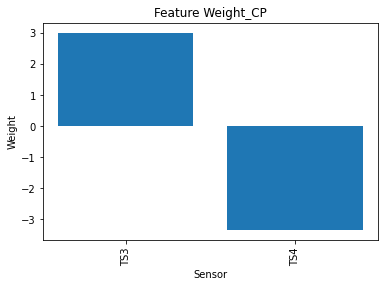

In [156]:
# 가중치 확인
# 변수의 가중치 확인
coefficients = lr.coef_
intercept = lr.intercept_

# 각 변수의 가중치 출력
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

# 절편(intercept) 출력
print("Intercept:", intercept)

# 가중치 값을 그래프로 시각화
plt.bar(X_train.columns, coefficients)
plt.xlabel('Sensor') 
plt.ylabel('Weight')
plt.title('Feature Weight_CP')
plt.xticks(rotation=90)
plt.show()


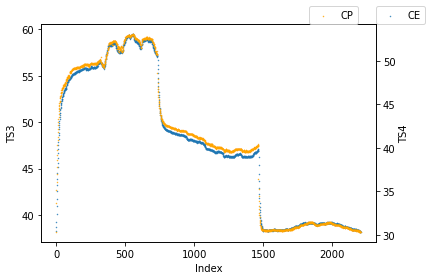

In [157]:
dataFrame2= dataFrame[dataFrame['SE']>20]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter (dataFrame2.index,dataFrame2['TS3'],s=0.2 ,label = "CE")
ax2.scatter (dataFrame2.index,dataFrame2['TS4'],s=0.2 ,label = 'CP',color='orange')
ax1.legend(loc=(1.0,1.0))
ax1.set_xlabel('Index')
ax1.set_ylabel('TS3')
ax2.set_ylabel('TS4')

ax2.legend(loc=(0.8,1.0))

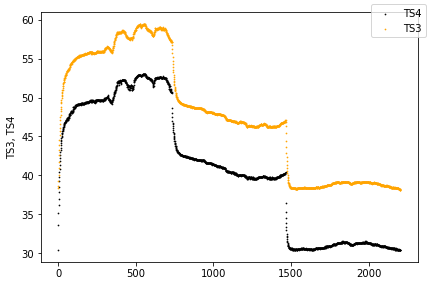

In [158]:
fig, ax1 = plt.subplots()  # 왼쪽 축

ax1.scatter(dataFrame.index,dataFrame['TS4'], label='TS4',s=0.5,color='black')
ax1.scatter(dataFrame.index,dataFrame['TS3'], label='TS3',s=0.5,color='orange')

ax1.set_ylabel('TS3, TS4')  # 왼쪽 축 레이블 설정

fig.tight_layout()  # 그래프 간격 조정
fig.legend()  # 범례 위치 설정
plt.show()


TS4나 TS3중 하나만 사용하여 CP를 예측한 경우

In [159]:
x= pd.DataFrame(scaled_df['TS3'],columns=['TS3'])
X_train, X_test, y_train, y_test = train_test_split(x, scaled_df['CE'], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("TS3 - CP  정확도:", accuracy)
print("")


TS3 - CP  정확도: 0.8960088078162061



In [160]:
x= pd.DataFrame(scaled_df['TS4'],columns=['TS4'])
X_train, X_test, y_train, y_test = train_test_split(x, scaled_df['CE'], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("TS4 - CP  정확도:", accuracy)
print("")


TS4 - CP  정확도: 0.9200407240362186



In [161]:
a='TS1'
x= pd.DataFrame(scaled_df[a],columns=[a])
X_train, X_test, y_train, y_test = train_test_split(x, scaled_df['CE'], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print(a,"- CP  정확도:", accuracy)
print("")


TS1 - CP  정확도: 0.9032950289884376



In [162]:
a='TS2'
x= pd.DataFrame(scaled_df[a],columns=[a])
X_train, X_test, y_train, y_test = train_test_split(x, scaled_df['CE'], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print(a,"- CP  정확도:", accuracy)
print("")


TS2 - CP  정확도: 0.9044029548090572



In [163]:
col = 'TS3'
input_col= [x for x in scaled_df.columns if x not in ['CE','CP','TS3','TS4']]
# print(input_col)
X_train, X_test, y_train, y_test = train_test_split(scaled_df[input_col], scaled_df[col], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("TS3  정확도:", accuracy)
print("")


TS3  정확도: 0.9998139173159093



EPS1: 0.04462833013946389
FS1: 0.004877379266767401
FS2: -0.18425833294933708
PS1: -0.055374675807853595
PS2: -0.03148531373287031
PS3: 0.0007990470096448515
PS4: 0.0033475115190194915
PS5: -0.035309689600542815
PS6: 0.031073242077912067
SE: 0.016138318609147967
TS1: 0.4871716724850025
TS2: 0.3134567157537924
VS1: 0.024723337212765806
Intercept: 0.19095352215613817


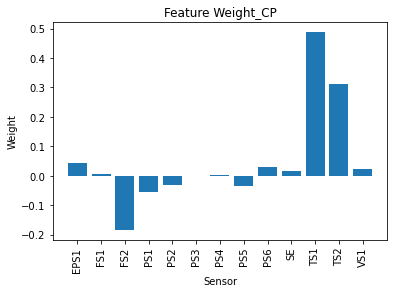

In [164]:
# 가중치 확인
# 변수의 가중치 확인
coefficients = lr.coef_
intercept = lr.intercept_

# 각 변수의 가중치 출력
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

# 절편(intercept) 출력
print("Intercept:", intercept)

# 가중치 값을 그래프로 시각화
plt.bar(X_train.columns, coefficients)
plt.xlabel('Sensor') 
plt.ylabel('Weight')
plt.title('Feature Weight_CP')
plt.xticks(rotation=90)
plt.show()


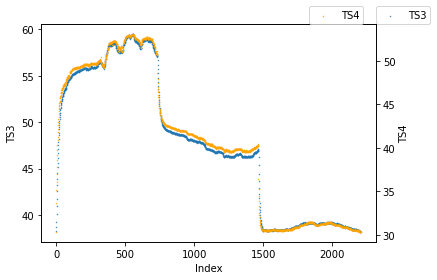

In [165]:
a='TS3'
b='TS4'
dataFrame2= dataFrame[dataFrame['SE']>20]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter (dataFrame2.index,dataFrame2[a],s=0.2 ,label = a)
ax2.scatter (dataFrame2.index,dataFrame2[b],s=0.2 ,label = b,color='orange')
ax1.legend(loc=(1.0,1.0))
ax1.set_xlabel('Index')
ax1.set_ylabel(a)
ax2.set_ylabel(b)

ax2.legend(loc=(0.8,1.0))

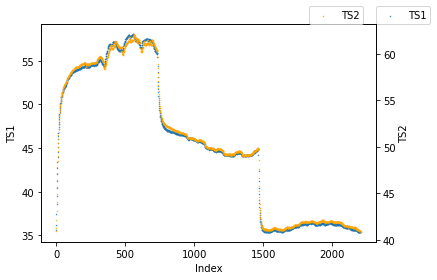

In [166]:
a='TS1'
b='TS2'
dataFrame2= dataFrame[dataFrame['SE']>20]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter (dataFrame2.index,dataFrame2[a],s=0.2 ,label = a)
ax2.scatter (dataFrame2.index,dataFrame2[b],s=0.2 ,label = b,color='orange')
ax1.legend(loc=(1.0,1.0))
ax1.set_xlabel('Index')
ax1.set_ylabel(a)
ax2.set_ylabel(b)

ax2.legend(loc=(0.8,1.0))

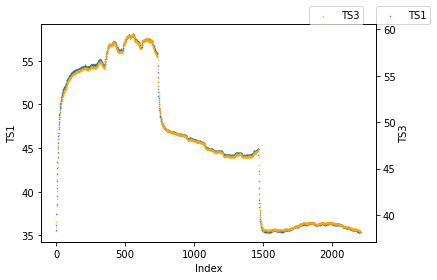

In [167]:
a='TS1'
b='TS3'
dataFrame2= dataFrame[dataFrame['SE']>20]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter (dataFrame2.index,dataFrame2[a],s=0.2 ,label = a)
ax2.scatter (dataFrame2.index,dataFrame2[b],s=0.2 ,label = b,color='orange')
ax1.legend(loc=(1.0,1.0))
ax1.set_xlabel('Index')
ax1.set_ylabel(a)
ax2.set_ylabel(b)

ax2.legend(loc=(0.8,1.0))

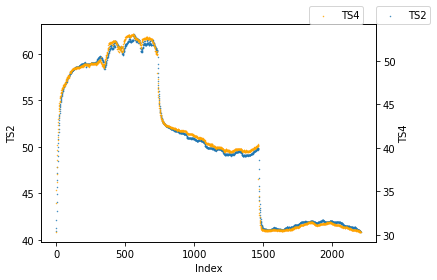

In [168]:
a='TS2'
b='TS4'
dataFrame2= dataFrame[dataFrame['SE']>20]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter (dataFrame2.index,dataFrame2[a],s=0.2 ,label = a)
ax2.scatter (dataFrame2.index,dataFrame2[b],s=0.2 ,label = b,color='orange')
ax1.legend(loc=(1.0,1.0))
ax1.set_xlabel('Index')
ax1.set_ylabel(a)
ax2.set_ylabel(b)

ax2.legend(loc=(0.8,1.0))

TS4는 다른 어떤 센서랑 연관되어 있는 지 확인 (TS1~4, CE, CP 제외)

In [169]:
col = 'TS4'
input_col= [x for x in scaled_df.columns if x not in ['TS1','TS2','TS3','TS4','CE','CP']]
# print(input_col)
X_train, X_test, y_train, y_test = train_test_split(scaled_df[input_col], scaled_df[col], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print(col,"  정확도:", accuracy)
print("")


TS4   정확도: 0.9966396382076487



EPS1: 0.19564514898170596
FS1: 0.0004593868767842624
FS2: -0.4921514136135798
PS1: -0.14956260012402015
PS2: -0.007058316946576548
PS3: 0.03899767776286589
PS4: 0.01042364352593994
PS5: -0.7840703641974773
PS6: 0.11005717073938026
SE: 0.05397576618591525
VS1: 0.01887805638708022
Intercept: 0.9812360693846129


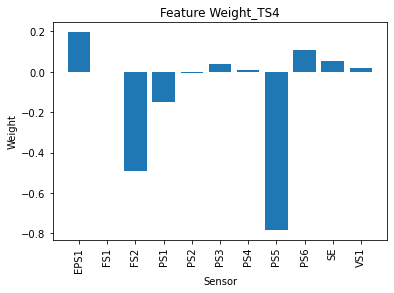

In [170]:
# 가중치 확인
# 변수의 가중치 확인
coefficients = lr.coef_
intercept = lr.intercept_

# 각 변수의 가중치 출력
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

# 절편(intercept) 출력
print("Intercept:", intercept)

# 가중치 값을 그래프로 시각화
plt.bar(X_train.columns, coefficients)
plt.xlabel('Sensor') 
plt.ylabel('Weight')
plt.title('Feature Weight_TS4')
plt.xticks(rotation=90)
plt.show()


In [171]:
li=[]
a=0.4
for feature, coef in zip(X_train.columns, coefficients):
    if (coef>a) | (coef <-a):
        li.append(feature)
print(li)


['FS2', 'PS5']


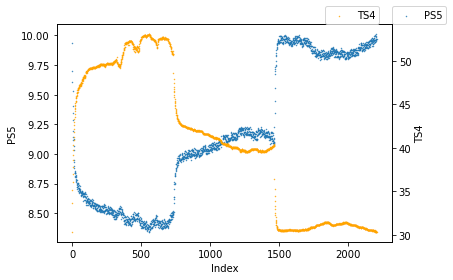

In [172]:
a='PS5'
b='TS4'
dataFrame2= dataFrame[dataFrame['SE']>20]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter (dataFrame2.index,dataFrame2[a],s=0.2 ,label = a)
ax2.scatter (dataFrame2.index,dataFrame2[b],s=0.2 ,label = b,color='orange')
ax1.legend(loc=(1.0,1.0))
ax1.set_xlabel('Index')
ax1.set_ylabel(a)
ax2.set_ylabel(b)

ax2.legend(loc=(0.8,1.0))

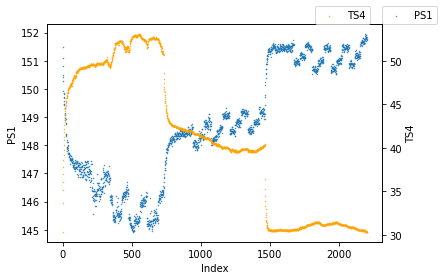

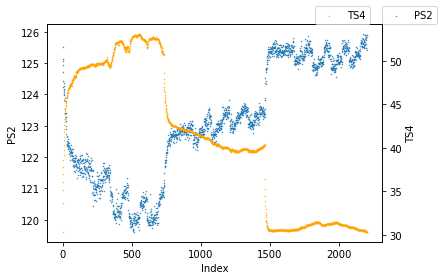

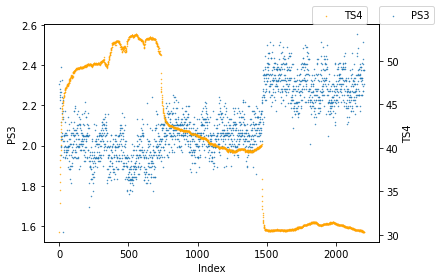

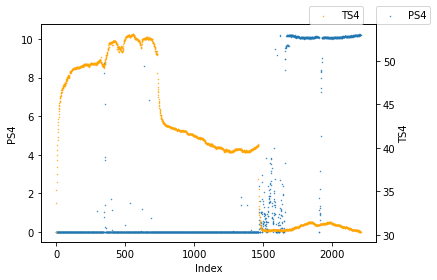

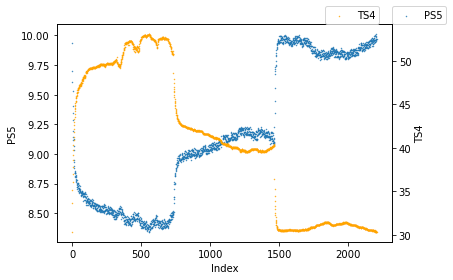

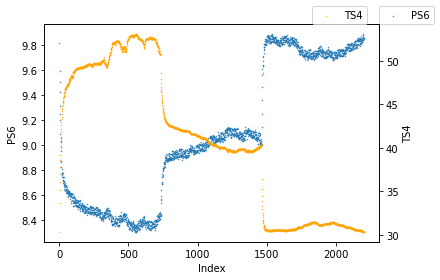

In [173]:
a='PS'
b='TS4'
for i in range(1,7):
    x= a+str(i)
    dataFrame2= dataFrame[dataFrame['SE']>20]

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.scatter (dataFrame2.index,dataFrame2[x],s=0.2 ,label = x)
    ax2.scatter (dataFrame2.index,dataFrame2[b],s=0.2 ,label = b,color='orange')
    ax1.legend(loc=(1.0,1.0))
    ax1.set_xlabel('Index')
    ax1.set_ylabel(x)
    ax2.set_ylabel(b)

    ax2.legend(loc=(0.8,1.0))

In [174]:
col = 'TS4'
# input_col= [x for x in scaled_df.columns if x not in ['TS1','TS2','TS3','TS4','CE','CP','PS5','PS6']]
input_col= ['FS1', 'FS2','SE', 'VS1']

print(input_col)
X_train, X_test, y_train, y_test = train_test_split(scaled_df[input_col], scaled_df[col], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print(col,"  정확도:", accuracy)
print("")


['FS1', 'FS2', 'SE', 'VS1']
TS4   정확도: 0.9861416415714886



FS1: -0.03669466013194
FS2: -1.2078064588252833
SE: 0.05284473163268444
VS1: 0.09134291690421212
Intercept: 1.0572322304281228


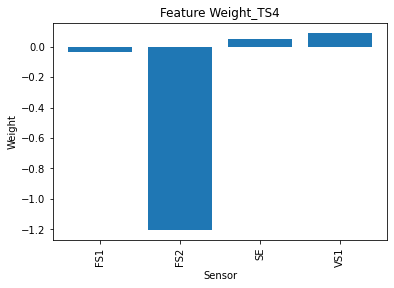

In [175]:
# 가중치 확인
# 변수의 가중치 확인
coefficients = lr.coef_
intercept = lr.intercept_

# 각 변수의 가중치 출력
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

# 절편(intercept) 출력
print("Intercept:", intercept)

# 가중치 값을 그래프로 시각화
plt.bar(X_train.columns, coefficients)
plt.xlabel('Sensor') 
plt.ylabel('Weight')
plt.title('Feature Weight_TS4')
plt.xticks(rotation=90)
plt.show()


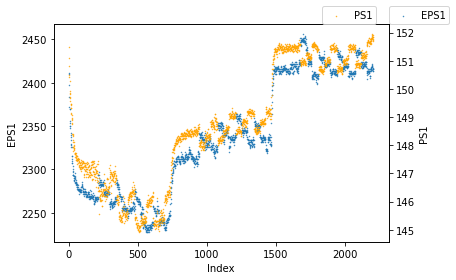

In [176]:
a='EPS1'
b='PS1'
dataFrame2= dataFrame[dataFrame['SE']>20]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter (dataFrame2.index,dataFrame2[a],s=0.2 ,label = a)
ax2.scatter (dataFrame2.index,dataFrame2[b],s=0.2 ,label = b,color='orange')
ax1.legend(loc=(1.0,1.0))
ax1.set_xlabel('Index')
ax1.set_ylabel(a)
ax2.set_ylabel(b)

ax2.legend(loc=(0.8,1.0))

In [177]:
col = 'TS4'
# input_col= [x for x in scaled_df.columns if x not in ['TS1','TS2','TS3','TS4','CE','CP','PS5','PS6']]
input_col= ['FS1','SE', 'VS1']

print(input_col)
X_train, X_test, y_train, y_test = train_test_split(scaled_df[input_col], scaled_df[col], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print(col,"  정확도:", accuracy)
print("")


['FS1', 'SE', 'VS1']
TS4   정확도: 0.781579539747562



FS1: -0.05818567333371895
SE: 0.3150570896125
VS1: 2.154020758128035
Intercept: -0.2141917979001382


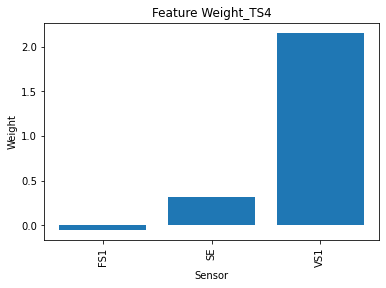

In [178]:
# 가중치 확인
# 변수의 가중치 확인
coefficients = lr.coef_
intercept = lr.intercept_

# 각 변수의 가중치 출력
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

# 절편(intercept) 출력
print("Intercept:", intercept)

# 가중치 값을 그래프로 시각화
plt.bar(X_train.columns, coefficients)
plt.xlabel('Sensor') 
plt.ylabel('Weight')
plt.title('Feature Weight_TS4')
plt.xticks(rotation=90)
plt.show()


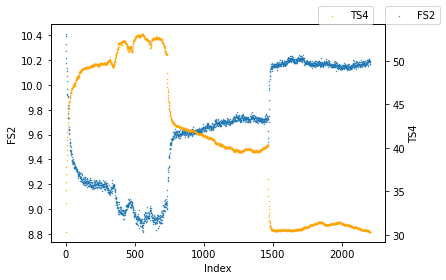

In [179]:
a='FS2'
b='TS4'
dataFrame2= dataFrame[dataFrame['SE']>20]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter (dataFrame2.index,dataFrame2[a],s=0.2 ,label = a)
ax2.scatter (dataFrame2.index,dataFrame2[b],s=0.2 ,label = b,color='orange')
ax1.legend(loc=(1.0,1.0))
ax1.set_xlabel('Index')
ax1.set_ylabel(a)
ax2.set_ylabel(b)

ax2.legend(loc=(0.8,1.0))

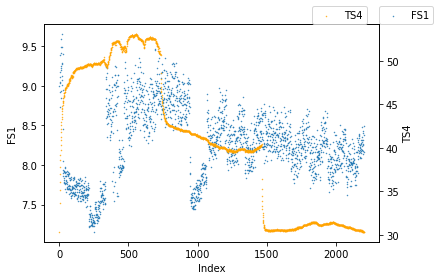

In [180]:
a='FS1'
b='TS4'
dataFrame2= dataFrame[dataFrame['SE']>20]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter (dataFrame2.index,dataFrame2[a],s=0.2 ,label = a)
ax2.scatter (dataFrame2.index,dataFrame2[b],s=0.2 ,label = b,color='orange')
ax1.legend(loc=(1.0,1.0))
ax1.set_xlabel('Index')
ax1.set_ylabel(a)
ax2.set_ylabel(b)

ax2.legend(loc=(0.8,1.0))

['SE', 'VS1']
TS4   정확도: 0.7794373562137988

SE: 0.30715950141844706
VS1: 2.146800825244837
Intercept: -0.2345330639019737


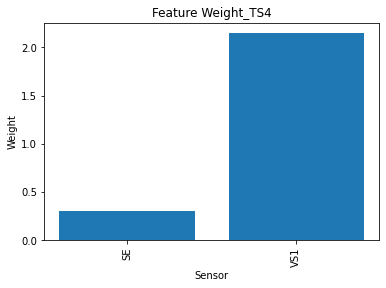

In [181]:
col = 'TS4'
# input_col= [x for x in scaled_df.columns if x not in ['TS1','TS2','TS3','TS4','CE','CP','PS5','PS6']]
input_col= ['SE', 'VS1']

print(input_col)
X_train, X_test, y_train, y_test = train_test_split(scaled_df[input_col], scaled_df[col], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print(col,"  정확도:", accuracy)
print("")

# 가중치 확인
# 변수의 가중치 확인
coefficients = lr.coef_
intercept = lr.intercept_

# 각 변수의 가중치 출력
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

# 절편(intercept) 출력
print("Intercept:", intercept)

# 가중치 값을 그래프로 시각화
plt.bar(X_train.columns, coefficients)
plt.xlabel('Sensor') 
plt.ylabel('Weight')
plt.title('Feature Weight_TS4')
plt.xticks(rotation=90)
plt.show()



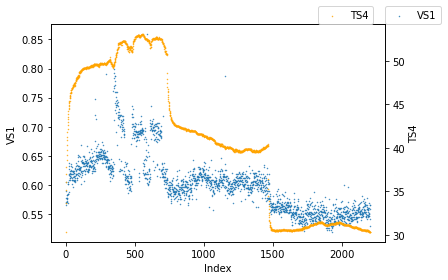

In [182]:
a='VS1'
b='TS4'
dataFrame2= dataFrame[dataFrame['SE']>20]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter (dataFrame2.index,dataFrame2[a],s=0.2 ,label = a)
ax2.scatter (dataFrame2.index,dataFrame2[b],s=0.2 ,label = b,color='orange')
ax1.legend(loc=(1.0,1.0))
ax1.set_xlabel('Index')
ax1.set_ylabel(a)
ax2.set_ylabel(b)

ax2.legend(loc=(0.8,1.0))

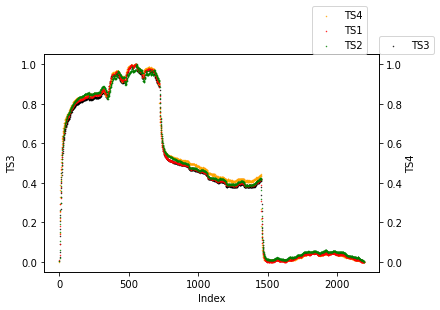

In [183]:
a='TS3'
b='TS4'
c='TS1'
d='TS2'
dataFrame2= dataFrame[dataFrame['SE']>20]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter (scaled_df.index,scaled_df[a],s=0.2 ,label = a,color='black')
ax2.scatter (scaled_df.index,scaled_df[b],s=0.2 ,label = b,color='orange')
ax2.scatter (scaled_df.index,scaled_df[c],s=0.2 ,label = c,color='red')
ax2.scatter (scaled_df.index,scaled_df[d],s=0.2 ,label = d,color='green')


ax1.legend(loc=(1.0,1.0))
ax1.set_xlabel('Index')
ax1.set_ylabel(a)
ax2.set_ylabel(b)

ax2.legend(loc=(0.8,1.0))

In [184]:
li= ['CE', 'CP', 'EPS1', 'FS2', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'TS1', 'TS2', 'TS3', 'TS4', 'VS1']
for i in li:
    a= pd.DataFrame(dataFrame2[i],columns=[i])
    X_train, X_test, y_train, y_test = train_test_split(a, dataFrame2['Cooler condition'], test_size=0.3, random_state=42)
    dtc  = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(i,"로 계산한  정확도:", accuracy)
    print("")
    # 가중치 확인
    # 변수의 가중치 확인
    coefficients = lr.coef_
    intercept = lr.intercept_



CE 로 계산한  정확도: 0.9984802431610942

CP 로 계산한  정확도: 0.9878419452887538

EPS1 로 계산한  정확도: 0.9711246200607903

FS2 로 계산한  정확도: 0.9544072948328267

PS1 로 계산한  정확도: 0.9620060790273556

PS2 로 계산한  정확도: 0.9604863221884499

PS3 로 계산한  정확도: 0.743161094224924

PS4 로 계산한  정확도: 0.6306990881458967

PS5 로 계산한  정확도: 0.9817629179331308

PS6 로 계산한  정확도: 0.9832826747720365

TS1 로 계산한  정확도: 0.9650455927051672

TS2 로 계산한  정확도: 0.9665653495440729

TS3 로 계산한  정확도: 0.9604863221884499

TS4 로 계산한  정확도: 0.9696048632218845

VS1 로 계산한  정확도: 0.8617021276595744



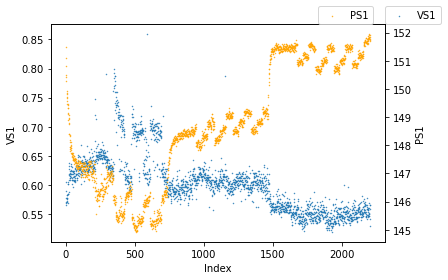

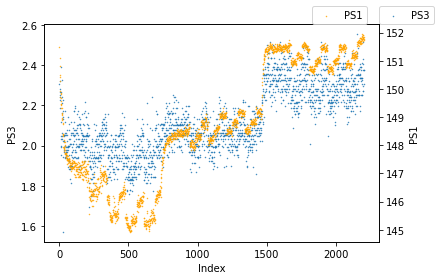

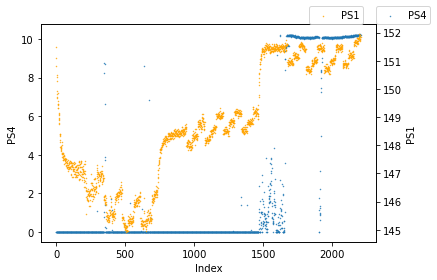

In [205]:
for i in ['VS1','PS3','PS4']:
    a=i
    b='PS1'
    dataFrame2= dataFrame[dataFrame['SE']>20]

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.scatter (dataFrame2.index,dataFrame2[a],s=0.2 ,label = a)
    ax2.scatter (dataFrame2.index,dataFrame2[b],s=0.2 ,label = b,color='orange')
    ax1.legend(loc=(1.0,1.0))
    ax1.set_xlabel('Index')
    ax1.set_ylabel(a)
    ax2.set_ylabel(b)

    ax2.legend(loc=(0.8,1.0))

## Internal pump leakage

Cooler condition   정확도: 0.9832826747720365

Feature: CE, Importance: 0.009175951463711855
Feature: CP, Importance: 0.03398178959795917
Feature: EPS1, Importance: 0.956842258938329


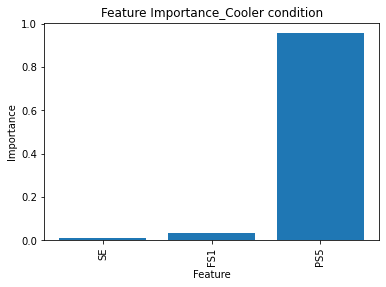

Internal pump leakage   정확도: 0.9574468085106383

Feature: CE, Importance: 0.9437669193848456
Feature: CP, Importance: 0.022568759698956154
Feature: EPS1, Importance: 0.03366432091619837


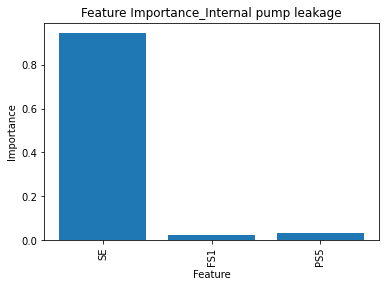

Hydraulic accumulator   정확도: 0.729483282674772

Feature: CE, Importance: 0.25172893744351243
Feature: CP, Importance: 0.3725785458076992
Feature: EPS1, Importance: 0.3756925167487884


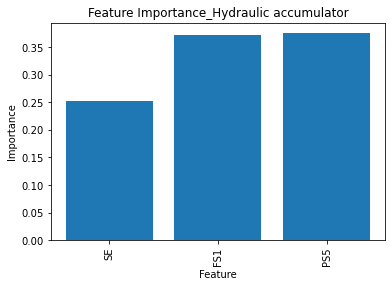

Valve condition   정확도: 0.48936170212765956

Feature: CE, Importance: 0.39688324592139007
Feature: CP, Importance: 0.2768292098442665
Feature: EPS1, Importance: 0.3262875442343435


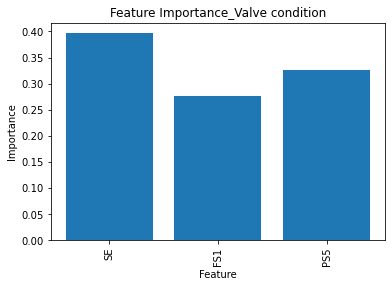

In [185]:
label_columns=['Cooler condition', 'Internal pump leakage', 'Hydraulic accumulator','Valve condition']
label_sen=['SE','FS1','PS5']
for i in label_columns:
    X_train, X_test, y_train, y_test = train_test_split(dataFrame2[label_sen], dataFrame2[i], test_size=0.3, random_state=42)
    dtc  = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(i,"  정확도:", accuracy)
    print("")
    # 중요도 값 확인
    importances = dtc.feature_importances_

    # 중요도 값을 출력
    for feature, importance in zip(dataFrame.columns[:-5], importances):
        print(f"Feature: {feature}, Importance: {importance}")

    # 중요도 값을 그래프로 시각화
    plt.bar(X_train.columns, importances)
    plt.xlabel('Feature') 
    plt.ylabel('Importance')
    plt.title('Feature Importance_'+i)
    plt.xticks(rotation=90)
    plt.show()




Internal pump leakage  정확도: 0.9559270516717325

Feature: CE, Importance: 0.006294757562582879
Feature: CP, Importance: 0.001652373860178006
Feature: EPS1, Importance: 0.00048516837506865334
Feature: FS1, Importance: 0.011489877823605754
Feature: FS2, Importance: 0.0014385205085646886
Feature: PS1, Importance: 0.01625133255201782
Feature: PS2, Importance: 0.0020896070075246314
Feature: PS3, Importance: 0.0065825084575565395
Feature: PS4, Importance: 0.0003404888741499947
Feature: PS5, Importance: 0.003034104001819667
Feature: PS6, Importance: 0.0014687767646026717
Feature: SE, Importance: 0.9312648504171301
Feature: TS1, Importance: 0.0
Feature: TS2, Importance: 0.0014214381406564165
Feature: TS3, Importance: 0.0035856046597123417
Feature: TS4, Importance: 0.010232659702573393
Feature: VS1, Importance: 0.002367931292256346


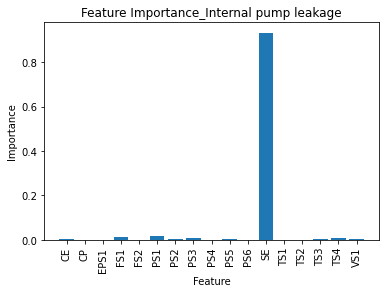

In [186]:
X_train, X_test, y_train, y_test = train_test_split(dataFrame2.iloc[:,:-5], dataFrame2['Internal pump leakage'], test_size=0.3, random_state=42)
dtc  = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Internal pump leakage  정확도:", accuracy)
print("")
# 중요도 값 확인
importances = dtc.feature_importances_

# 중요도 값을 출력
for feature, importance in zip(X_train, importances):
    print(f"Feature: {feature}, Importance: {importance}")

# 중요도 값을 그래프로 시각화
plt.bar(X_train.columns, importances)
plt.xlabel('Feature') 
plt.ylabel('Importance')
plt.title('Feature Importance_Internal pump leakage')
plt.xticks(rotation=90)
plt.show()




In [187]:
x= [x for x in dataFrame2.columns[:-5] if x != 'SE']
X_train, X_test, y_train, y_test = train_test_split(scaled_df[x], scaled_df['SE'], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("SE  정확도:", accuracy)
print("")

SE  정확도: 0.9257746875617331



CE: -0.1432657034975548
CP: 0.43961774918694213
EPS1: -2.6365598307833333
FS1: 0.07269560716370504
FS2: 1.5926825993916083
PS1: 2.3271089062239185
PS2: 0.4258512416305729
PS3: 0.06877794756486935
PS4: -0.08757495200545806
PS5: 0.5073561739190805
PS6: 0.5619077931216139
TS1: -1.9247335629375508
TS2: 1.2969391603615628
TS3: 2.297563019032449
TS4: 0.9856421905164201
VS1: -0.10826084101084536
Intercept: -2.3848635158403915


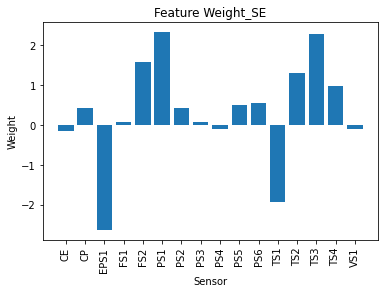

In [188]:
# 가중치 확인
# 변수의 가중치 확인
coefficients = lr.coef_
intercept = lr.intercept_

# 각 변수의 가중치 출력
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

# 절편(intercept) 출력
print("Intercept:", intercept)

# 가중치 값을 그래프로 시각화
plt.bar(X_train.columns, coefficients)
plt.xlabel('Sensor') 
plt.ylabel('Weight')
plt.title('Feature Weight_SE')
plt.xticks(rotation=90)
plt.show()


In [189]:
x= ['EPS1','PS1','FS2','TS3']
X_train, X_test, y_train, y_test = train_test_split(scaled_df[x], scaled_df['SE'], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("SE  정확도:", accuracy)
print("")

SE  정확도: 0.9014629691571888



EPS1: -2.645412965956543
PS1: 3.033554028546003
FS2: 0.5515982852892367
TS3: 0.9866776094076934
Intercept: -0.5556440312215628


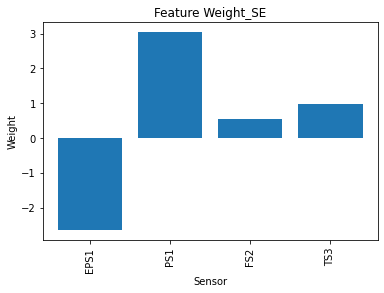

In [190]:
# 가중치 확인
# 변수의 가중치 확인
coefficients = lr.coef_
intercept = lr.intercept_

# 각 변수의 가중치 출력
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

# 절편(intercept) 출력
print("Intercept:", intercept)

# 가중치 값을 그래프로 시각화
plt.bar(X_train.columns, coefficients)
plt.xlabel('Sensor') 
plt.ylabel('Weight')
plt.title('Feature Weight_SE')
plt.xticks(rotation=90)
plt.show()


SE  정확도: 0.8988732279022971

EPS1: -2.6762410129181116
PS1: 3.055700382232441
TS3: 0.5388686025397718
Intercept: -0.06418771754827202


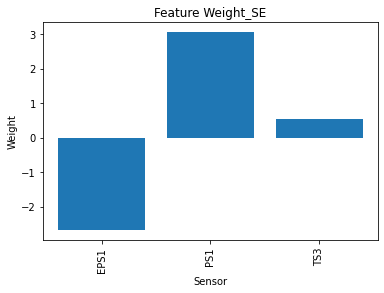

In [191]:

x= ['EPS1','PS1','TS3']
X_train, X_test, y_train, y_test = train_test_split(scaled_df[x], scaled_df['SE'], test_size=0.3, random_state=42)
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("SE  정확도:", accuracy)
print("")
# 가중치 확인
# 변수의 가중치 확인
coefficients = lr.coef_
intercept = lr.intercept_

# 각 변수의 가중치 출력
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

# 절편(intercept) 출력
print("Intercept:", intercept)

# 가중치 값을 그래프로 시각화
plt.bar(X_train.columns, coefficients)
plt.xlabel('Sensor') 
plt.ylabel('Weight')
plt.title('Feature Weight_SE')
plt.xticks(rotation=90)
plt.show()


SE  정확도: 0.6805280671153162

PS1: 4.156398607067267
TS3: 3.6445421992109943
Intercept: -3.3305621527971385


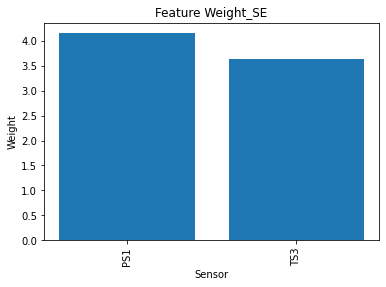

SE  정확도: 0.6123984239855655

EPS1: -3.8934113209882537
TS3: -3.002681388650042
Intercept: 3.7524274318043207


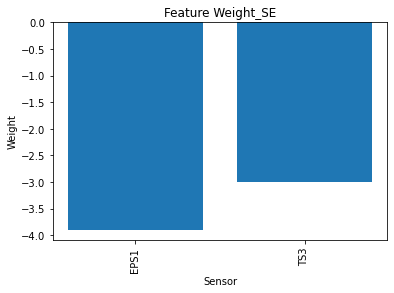

SE  정확도: 0.895198499037759

EPS1: -2.994628933382256
PS1: 2.727370005063622
Intercept: 0.5066263940319994


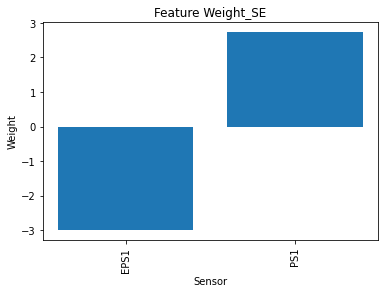

In [192]:

x= ['EPS1','PS1','TS3']
for i in x:
    y= [a for a in x if a != i]
    X_train, X_test, y_train, y_test = train_test_split(scaled_df[y], scaled_df['SE'], test_size=0.3, random_state=42)
    lr  = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    print("SE  정확도:", accuracy)
    print("")
    # 가중치 확인
    # 변수의 가중치 확인
    coefficients = lr.coef_
    intercept = lr.intercept_

    # 각 변수의 가중치 출력
    for feature, coef in zip(X_train.columns, coefficients):
        print(f"{feature}: {coef}")

    # 절편(intercept) 출력
    print("Intercept:", intercept)

    # 가중치 값을 그래프로 시각화
    plt.bar(X_train.columns, coefficients)
    plt.xlabel('Sensor') 
    plt.ylabel('Weight')
    plt.title('Feature Weight_SE')
    plt.xticks(rotation=90)
    plt.show()


SE  정확도: 0.13936717514769414

EPS1: -0.335641113101095
Intercept: 0.7044183602962617


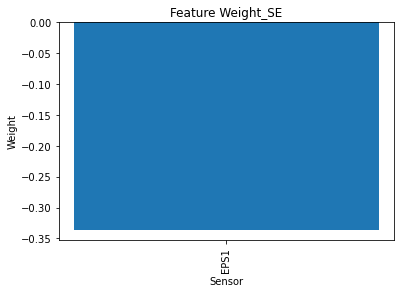

SE  정확도: 0.011858500565095964

PS1: -0.09036864366728518
Intercept: 0.5899630991185674


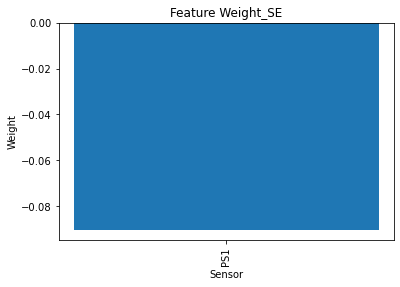

SE  정확도: 0.06238229870583911

TS3: 0.18116253312072012
Intercept: 0.4613761064047953


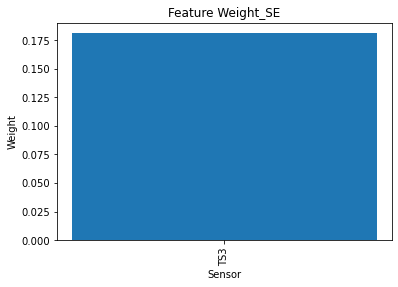

In [193]:
x= ['EPS1','PS1','TS3']
for i in x:
    a= pd.DataFrame(scaled_df[i],columns=[i])
    X_train, X_test, y_train, y_test = train_test_split(a, scaled_df['SE'], test_size=0.3, random_state=42)
    lr  = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    print("SE  정확도:", accuracy)
    print("")
    # 가중치 확인
    # 변수의 가중치 확인
    coefficients = lr.coef_
    intercept = lr.intercept_

    # 각 변수의 가중치 출력
    for feature, coef in zip(X_train.columns, coefficients):
        print(f"{feature}: {coef}")

    # 절편(intercept) 출력
    print("Intercept:", intercept)

    # 가중치 값을 그래프로 시각화
    plt.bar(X_train.columns, coefficients)
    plt.xlabel('Sensor') 
    plt.ylabel('Weight')
    plt.title('Feature Weight_SE')
    plt.xticks(rotation=90)
    plt.show()


SE, FS1을 제외한모든 값들이 비슷한형태의그래프를 보여줌

번외) 각 label들(stable flag제외)이 stable flag에 미치는 영향

In [195]:
X_train, X_test, y_train, y_test = train_test_split(dataFrame2.iloc[:,-5:-1], dataFrame2.iloc[:,-1], test_size=0.3, random_state=42)
dtc  = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)


정확도: 0.9214501510574018


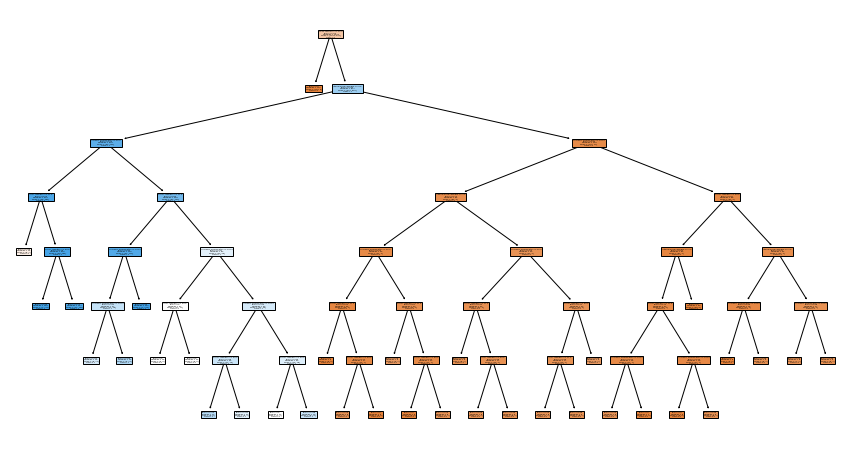

In [198]:
#시각화 
fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(dtc, 
                  feature_names=X_train.columns,
                  class_names=['0', '1'],
                  filled=True)

In [203]:
dt_clf_model_text = tree.export_text(dtc, feature_names=list(X_train.columns))
print(dt_clf_model_text)


|--- Valve condition <= 95.00
|   |--- class: 0
|--- Valve condition >  95.00
|   |--- Internal pump leakage <= 0.50
|   |   |--- Hydraulic accumulator <= 95.00
|   |   |   |--- Cooler condition <= 11.50
|   |   |   |   |--- class: 0
|   |   |   |--- Cooler condition >  11.50
|   |   |   |   |--- Cooler condition <= 60.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Cooler condition >  60.00
|   |   |   |   |   |--- class: 1
|   |   |--- Hydraulic accumulator >  95.00
|   |   |   |--- Cooler condition <= 11.50
|   |   |   |   |--- Hydraulic accumulator <= 122.50
|   |   |   |   |   |--- Hydraulic accumulator <= 107.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Hydraulic accumulator >  107.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Hydraulic accumulator >  122.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Cooler condition >  11.50
|   |   |   |   |--- Hydraulic accumulator <= 107.50
|   |   |   |   |   |--- Cooler condition <= 60.

In [194]:
labels=dataFrame.iloc[:,-5:]
pd.options.display.max_columns = None
pd.options.display.max_rows = None
label_columns=[ 'Valve condition', 'Cooler condition','Internal pump leakage', 'Hydraulic accumulator','stable flag']

# pure_labels = labels.groupby(label_columns).size()
# print(pure_labels)
labels_a= labels
pure_labels = labels_a.groupby(label_columns).size()
print(pure_labels)
pd.options.display.max_columns = 18
pd.options.display.max_rows = 20


Valve condition  Cooler condition  Internal pump leakage  Hydraulic accumulator  stable flag
73               3                 0                      90                     0               10
                                                          100                    0               10
                                                          115                    0               10
                                                          130                    0               10
                                   1                      90                     0               10
                                                          100                    0               10
                                                          115                    0               10
                                                          130                    0               10
                                   2                      90                     0               10
       

1. Valve condition이 73 80 90일경우 무조건 0이 나옴 


2. Internal pump leakage가 1이나 2이면 0이 10개, 1이 1개 나온다

3. valve = 100 ,internal pump = 0 일 때, (cooler, Hydraulic)이 (3, 130)일때 1이 나올 확률이 압도적, (20,90)일때 1이 나올 확률이 압도적, (100, 90)일때 1이 나올 확률이 압도적